In [1]:
# Importing the packages:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import datetime

In [2]:
# Loading the dataset:
data = pd.read_csv('IGLIKES1.csv')

In [3]:
# Viewing the data
print(data)

         Day   Time  Result
0     1/7/20   0:00      12
1     1/7/20   1:00       6
2     1/7/20   2:00       5
3     1/7/20   3:00       3
4     1/7/20   4:00       2
..       ...    ...     ...
739  31/7/20  19:00      59
740  31/7/20  20:00      83
741  31/7/20  21:00      87
742  31/7/20  22:00      98
743  31/7/20  23:00      50

[744 rows x 3 columns]


In [5]:
# Adding and applying a 'Day of Week' column
data['Day'] = pd.to_datetime(data['Day'])
data['Day of Week'] = data['Day'].dt.day_name()
print(data)

           Day   Time  Result Day of Week
0   2020-01-07   0:00      12     Tuesday
1   2020-01-07   1:00       6     Tuesday
2   2020-01-07   2:00       5     Tuesday
3   2020-01-07   3:00       3     Tuesday
4   2020-01-07   4:00       2     Tuesday
..         ...    ...     ...         ...
739 2020-07-31  19:00      59      Friday
740 2020-07-31  20:00      83      Friday
741 2020-07-31  21:00      87      Friday
742 2020-07-31  22:00      98      Friday
743 2020-07-31  23:00      50      Friday

[744 rows x 4 columns]


In [6]:
#Creating a dmap dictionary
dmap = {'Monday':'Mon', 'Tuesday':'Tue', 'Wednesday':'Wed', 'Thursday':'Thu', 'Friday':'Fri', 'Saturday':'Sat', 'Sunday':'Sun'}
data['Day of Week'] = data['Day of Week'].map(dmap)
print(data)

           Day   Time  Result Day of Week
0   2020-01-07   0:00      12         Tue
1   2020-01-07   1:00       6         Tue
2   2020-01-07   2:00       5         Tue
3   2020-01-07   3:00       3         Tue
4   2020-01-07   4:00       2         Tue
..         ...    ...     ...         ...
739 2020-07-31  19:00      59         Fri
740 2020-07-31  20:00      83         Fri
741 2020-07-31  21:00      87         Fri
742 2020-07-31  22:00      98         Fri
743 2020-07-31  23:00      50         Fri

[744 rows x 4 columns]


In [7]:
# Restructuring the date format
data['Day'] = pd.to_datetime(data['Day']).dt.strftime('%d/%m/%Y')
# Changing the ordering from alphabetically to the correct order of the days of the week
restr_data=data.groupby(['Time', 'Day of Week']).mean()['Result'].unstack()
restr_data = restr_data[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']]
print(data)

            Day   Time  Result Day of Week
0    07/01/2020   0:00      12         Tue
1    07/01/2020   1:00       6         Tue
2    07/01/2020   2:00       5         Tue
3    07/01/2020   3:00       3         Tue
4    07/01/2020   4:00       2         Tue
..          ...    ...     ...         ...
739  31/07/2020  19:00      59         Fri
740  31/07/2020  20:00      83         Fri
741  31/07/2020  21:00      87         Fri
742  31/07/2020  22:00      98         Fri
743  31/07/2020  23:00      50         Fri

[744 rows x 4 columns]


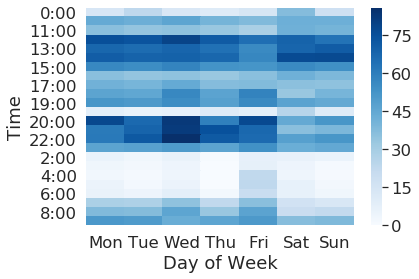

In [33]:
#Create the heatmap
sb.heatmap(restr_data, cmap = "Blues")

In [34]:
# Adjust heatmap font size
sb.set(font_scale = 1.5)

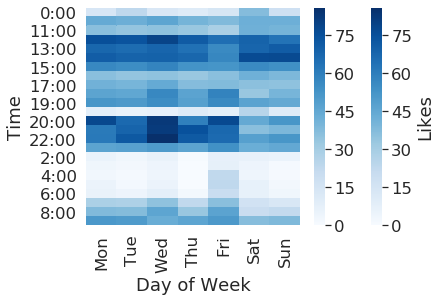

In [35]:
# Add the colourbar label 'Likes'
sb.heatmap(data.pivot_table(index='Time', columns='Day of Week', values='Result'), cbar_kws={'label': 'Likes'}, cmap = "Blues")
sb.heatmap(restr_data, cmap = "Blues")